# Lab 3. Least squares analysis
### Adrian Marziliano
#### Computational Methods for Geoscience - EPS 400/522
#### Instructor: Eric Lindsey

Due: Sept. 14, 2023

---------

In [1]:
# some useful imports and settings
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import netCDF4 as nc
import datetime
from scipy.stats import linregress

# better looking figures on high-resolution screens
%config InlineBackend.figure_format = 'retina'

### Assignment 1. Fitting a line to the SST data

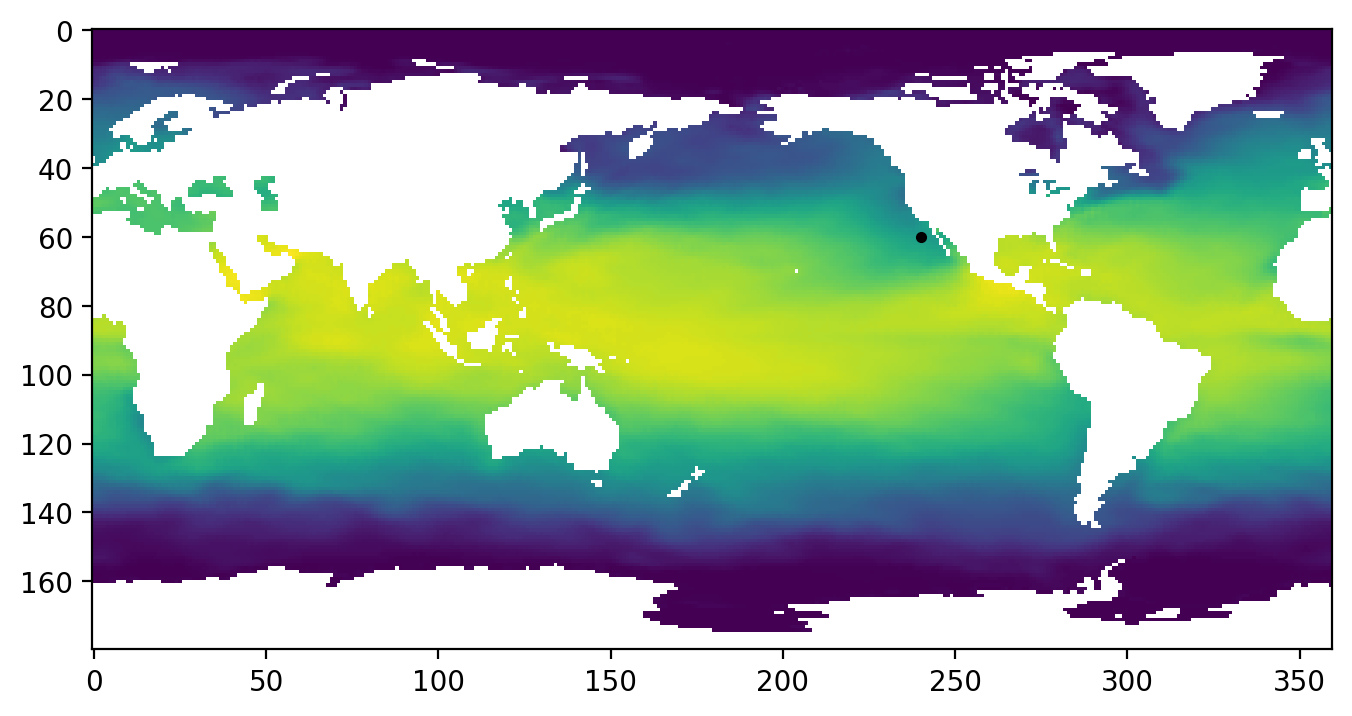

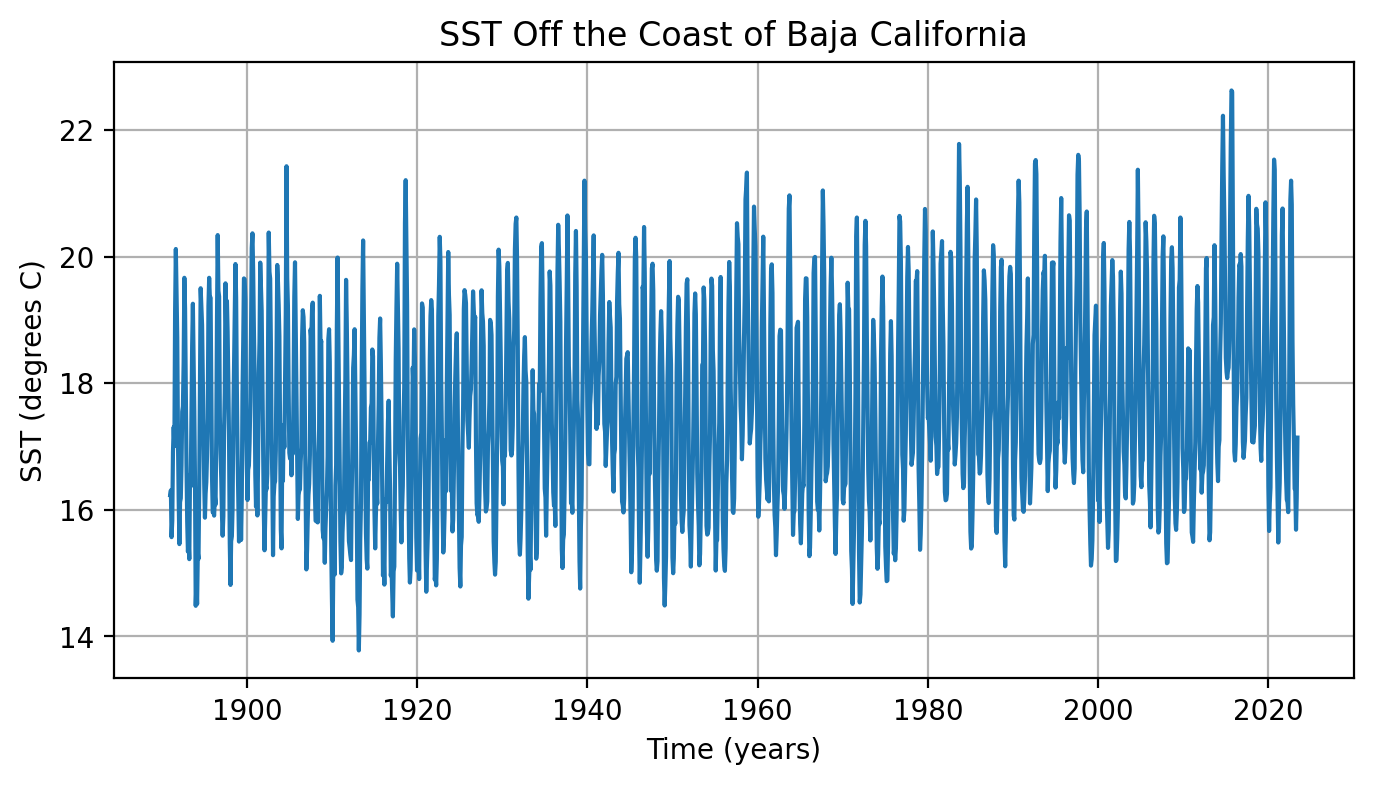

In [2]:
# Load in some of the data from the SST dataset last week
dataset = nc.Dataset('/Users/Adrian/Downloads/sst.mon.mean.nc')
latest=dataset['sst'][-1,:,:]

# make a quick map:
plt.figure(figsize=(8,6))
plt.imshow(latest)

# choose the lat and lon location of our point and show it on the map:
ilon=240
ilat=60
plt.plot(ilon,ilat,'k.')

# finish the map
plt.show()

# extract one timeseries from the SST data, at this location.
# remember, this is stored as a 3D array, with the 3 indices meaning: (time,lat,lon) so that's how we slice the array.
timeseries=dataset['sst'][:,ilat,ilon]

start = datetime.datetime(1891,1,1)
dateslist=[]
for i in range(len(dataset['time'])):
    date = start + datetime.timedelta(int(dataset['time'][i]))
    dateslist.append(date)
    
plt.figure(figsize=(8,4))
plt.plot(dateslist,timeseries)
plt.title('SST Off the Coast of Baja California')
plt.ylabel('SST (degrees C)')
plt.xlabel('Time (years)')
plt.grid()

Do you see a trend in the data above? Use either the Linear Algebra approach or the Scipy approach to find out how fast the Pacific is warming off the coast of Baja California.

Your final result should include: 

- A plot of the SST values with the best-fitting line on top.
- The title of the plot should include the latitude and longitude, and the rate of ocean warming at this location - make sure to state the units, too. (Note: the variable I created above called "ilat" is not exactly the same as the true latitude of this point. You'll have to fix this!)
- Optional: do the calculation again for a new location. Include a map to show where you picked!

In [45]:
# Define a function that will convert values from 0 to 180 into latitude and values from 0 to 360 to longitude
def convert_to_lat_lon(latitude_number, longitude_number):
    # Check if latitude number is within range [0, 180]
    if 0 <= latitude_number <= 180:
        latitude = latitude_number
    else:
        raise ValueError("Latitude number must be in the range 0 to 180.")

    # Check if longitude number is within range [0, 360]
    if 0 <= longitude_number <= 360:
        longitude = longitude_number
    else:
        raise ValueError("Longitude number must be in the range 0 to 360.")

    # Determine if it's in the Southern Hemisphere
    if latitude_number > 90:
        latitude = -latitude

    # Determine if it's in the Western Hemisphere
    if longitude_number > 180:
        longitude = longitude - 360

    return latitude, longitude

# Example usage:
latitude_number = ilat  # Example latitude number between 0 and 180
longitude_number = ilon  # Example longitude number between 0 and 360

latitude, longitude = convert_to_lat_lon(latitude_number, longitude_number)

print(f"Latitude: {latitude} N, Longitude: {longitude} W")


Latitude: 60 N, Longitude: -120 W


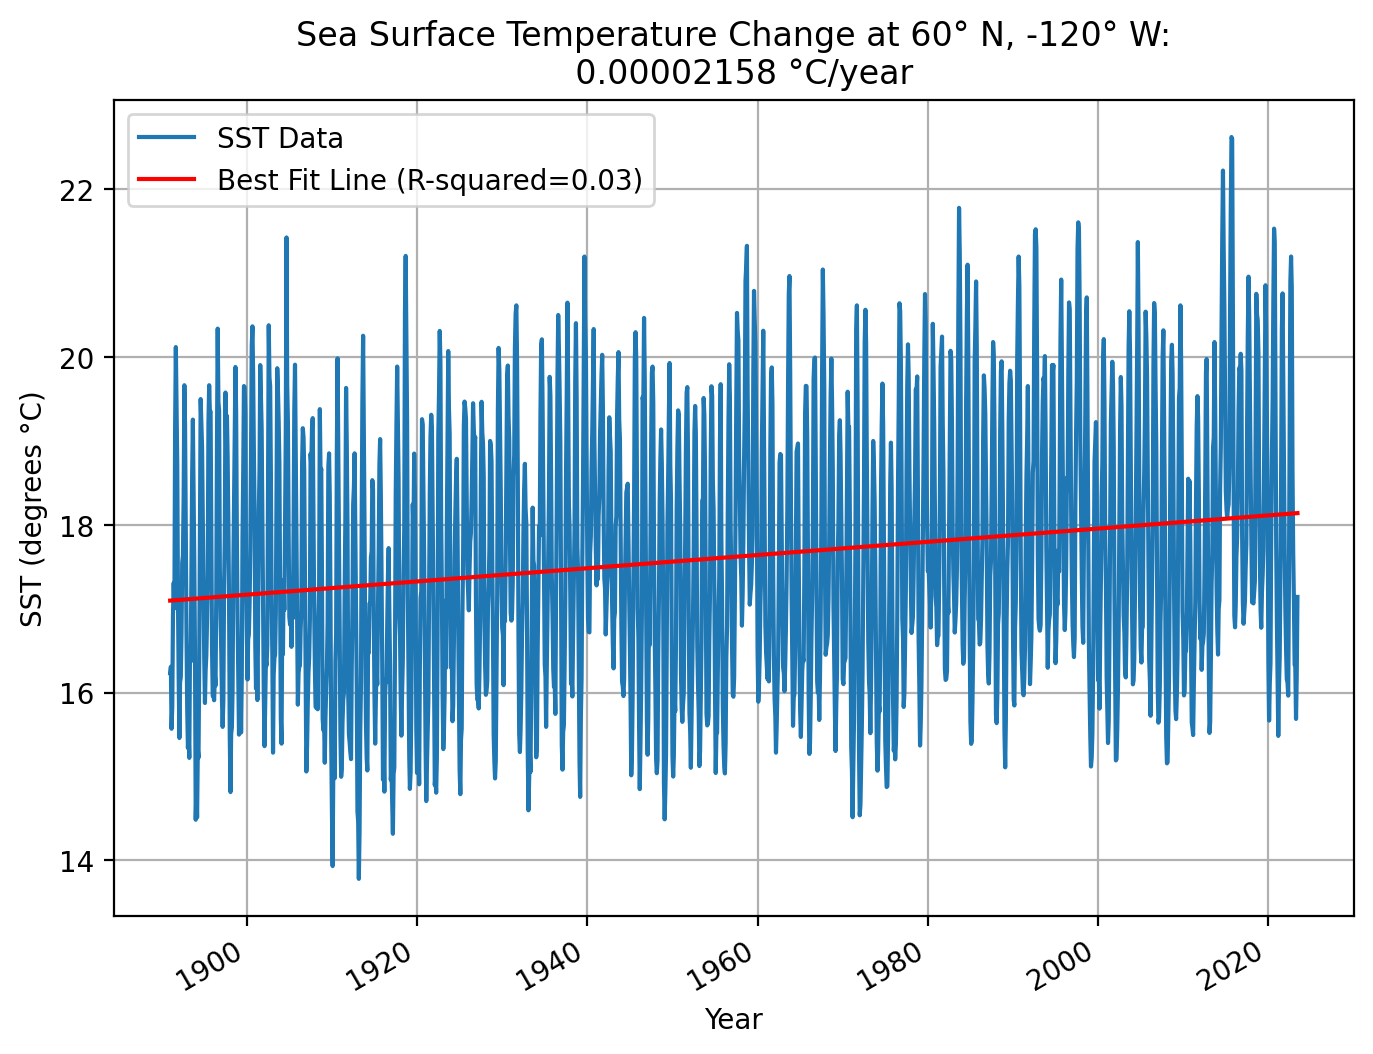

In [48]:
# Convert datetime objects to numerical values (for regression)
numeric_dates = matplotlib.dates.date2num(dateslist)

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(numeric_dates, timeseries)

# Create the best-fitting line
best_fit_line = slope * numeric_dates + intercept

# Create a scatter plot of the SST data
plt.figure(figsize=(8,6))
plt.plot(dateslist, timeseries, label='SST Data')

# Plot the best-fitting line
plt.plot(dateslist, best_fit_line, label=f'Best Fit Line (R-squared={r_value**2:.2f})', color='red')

# Add labels and a legend
plt.title(f'Sea Surface Temperature Change at {latitude}\N{DEGREE SIGN} N, {longitude}\N{DEGREE SIGN} W:\n {slope: 0.8f} \N{DEGREE SIGN}C/year')
plt.xlabel('Year')
plt.ylabel('SST (degrees °C)')
plt.legend()
plt.grid()

# Format the x-axis as dates
plt.gcf().autofmt_xdate()

# Display the plot
plt.show()


### Assignment 2. Fit lines to GPS data

1. Go to the following website: http://geodesy.unr.edu/NGLStationPages/gpsnetmap/GPSNetMap_MAG.html or http://geodesy.unr.edu/magnet.php. This is a map showing the locations of several thousand GPS sites with processed data worldwide. Browse the global map of GPS data, and pick a site with some data that looks interesting - ideally with at least 5 years of data, a steady slope, and possibly an offset like in the example above. It may even have some nonlinear features, like a 'post-seismic' decay following a large earthquake. However, don't make your life too hard by picking a really complicated one, and also note that in the browse figures, the cyan lines represent equipment changes, and are not "real" geophysical signals, though we may need to account for them as unknown offsets in our fitting anyway. If you're worried about this being too complicated, I'd suggest looking for a site with a simple linear trend and no visible offsets.

2. Pick one site that you like, click on the plot to go to the site page, and download the 'tenv3' file (right click the link and choose save as...). You can choose whether to download the "IGS14" file, which uses a constant global 'average' reference frame for all the sites, so sites on different tectonic plates will have very different velocities, or you can download the plate-referenced file (for sites in North America these are labeled 'NA', for example). The second set will usually have much lower velocities since the reference frame is defined to move with that plate.

3. Read in these data using Pandas (note the tenv3 files are whitespace-delimited), and plot the 'yyyy.yyyy' (decimal year) column vs. the '__east(m)', '_north(m)' and '____up(m)' columns, optionally with 'sig_e(m)' 'sig_n(m)' 'sig_u(m)' for uncertainties (though it may make the plot too crowded). Use 3 subplots to make a nice plot of the data, similar to the figures on the MAGNET site.

4. Fit a line (or a curve) to each of the 3 components of the data, using any model parameters (linear or nonlinear) that you feel are appropriate for your data, and print out the E, N and U velocities of the site relative to whichever reference frame you chose. How close are you to the velocities reported on the MAGNET site (shown as inset text in the figures)?

<i>Data downloaded for DIRT site from:
http://geodesy.unr.edu/NGLStationPages/stations/DIRT.sta </i>

In [53]:
# Check Data Read-in
file_path = '/Users/Adrian/Downloads/DIRT.tenv3'
df = pd.read_csv(file_path, delim_whitespace=True )
df

,site,YYMMMDD,yyyy.yyyy,__MJD,week,d,reflon,_e0(m),__east(m),____n0(m),...,_ant(m),sig_e(m),sig_n(m),sig_u(m),__corr_en,__corr_eu,__corr_nu,_latitude(deg),_longitude(deg),__height(m)
0,DIRT,10JUL29,2010.5736,55406,1594,4,-110.4,1780,0.616119,4197989,...,0.18,0.000732,0.000887,0.003000,-0.050723,-0.124409,0.037038,37.914332,-110.379751,1196.30349
1,DIRT,10JUL30,2010.5763,55407,1594,5,-110.4,1780,0.613466,4197989,...,0.18,0.000738,0.000890,0.002963,-0.037843,-0.141944,-0.001414,37.914332,-110.379751,1196.30641
2,DIRT,10JUL31,2010.5791,55408,1594,6,-110.4,1780,0.614428,4197989,...,0.18,0.000721,0.000881,0.002986,-0.010177,-0.144624,0.033757,37.914332,-110.379751,1196.29931
3,DIRT,10AUG01,2010.5818,55409,1595,0,-110.4,1780,0.612903,4197989,...,0.18,0.000723,0.000883,0.003030,0.007820,-0.164620,0.023874,37.914332,-110.379751,1196.30473
4,DIRT,10AUG02,2010.5845,55410,1595,1,-110.4,1780,0.612427,4197989,...,0.18,0.000691,0.000850,0.002834,-0.014993,-0.145095,0.025422,37.914332,-110.379751,1196.29398
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2432,DIRT,19APR25,2019.3128,58598,2050,4,-110.4,1780,0.489437,4197989,...,0.18,0.001277,0.001634,0.005287,-0.270645,0.009072,-0.128307,37.914331,-110.379752,1196.29907
2433,DIRT,19APR26,2019.3155,58599,2050,5,-110.4,1780,0.488932,4197989,...,0.18,0.001253,0.001602,0.005376,-0.227640,-0.018380,-0.146654,37.914331,-110.379752,1196.29972
2434,DIRT,19APR27,2019.3183,58600,2050,6,-110.4,1780,0.489739,4197989,...,0.18,0.001259,0.001634,0.005356,-0.250298,-0.005847,-0.138043,37.914331,-110.379752,1196.30135
2435,DIRT,19APR28,2019.3210,58601,2051,0,-110.4,1780,0.489858,4197989,...,0.18,0.001291,0.001622,0.005455,-0.245565,-0.000560,-0.154676,37.914331,-110.379752,1196.29368


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


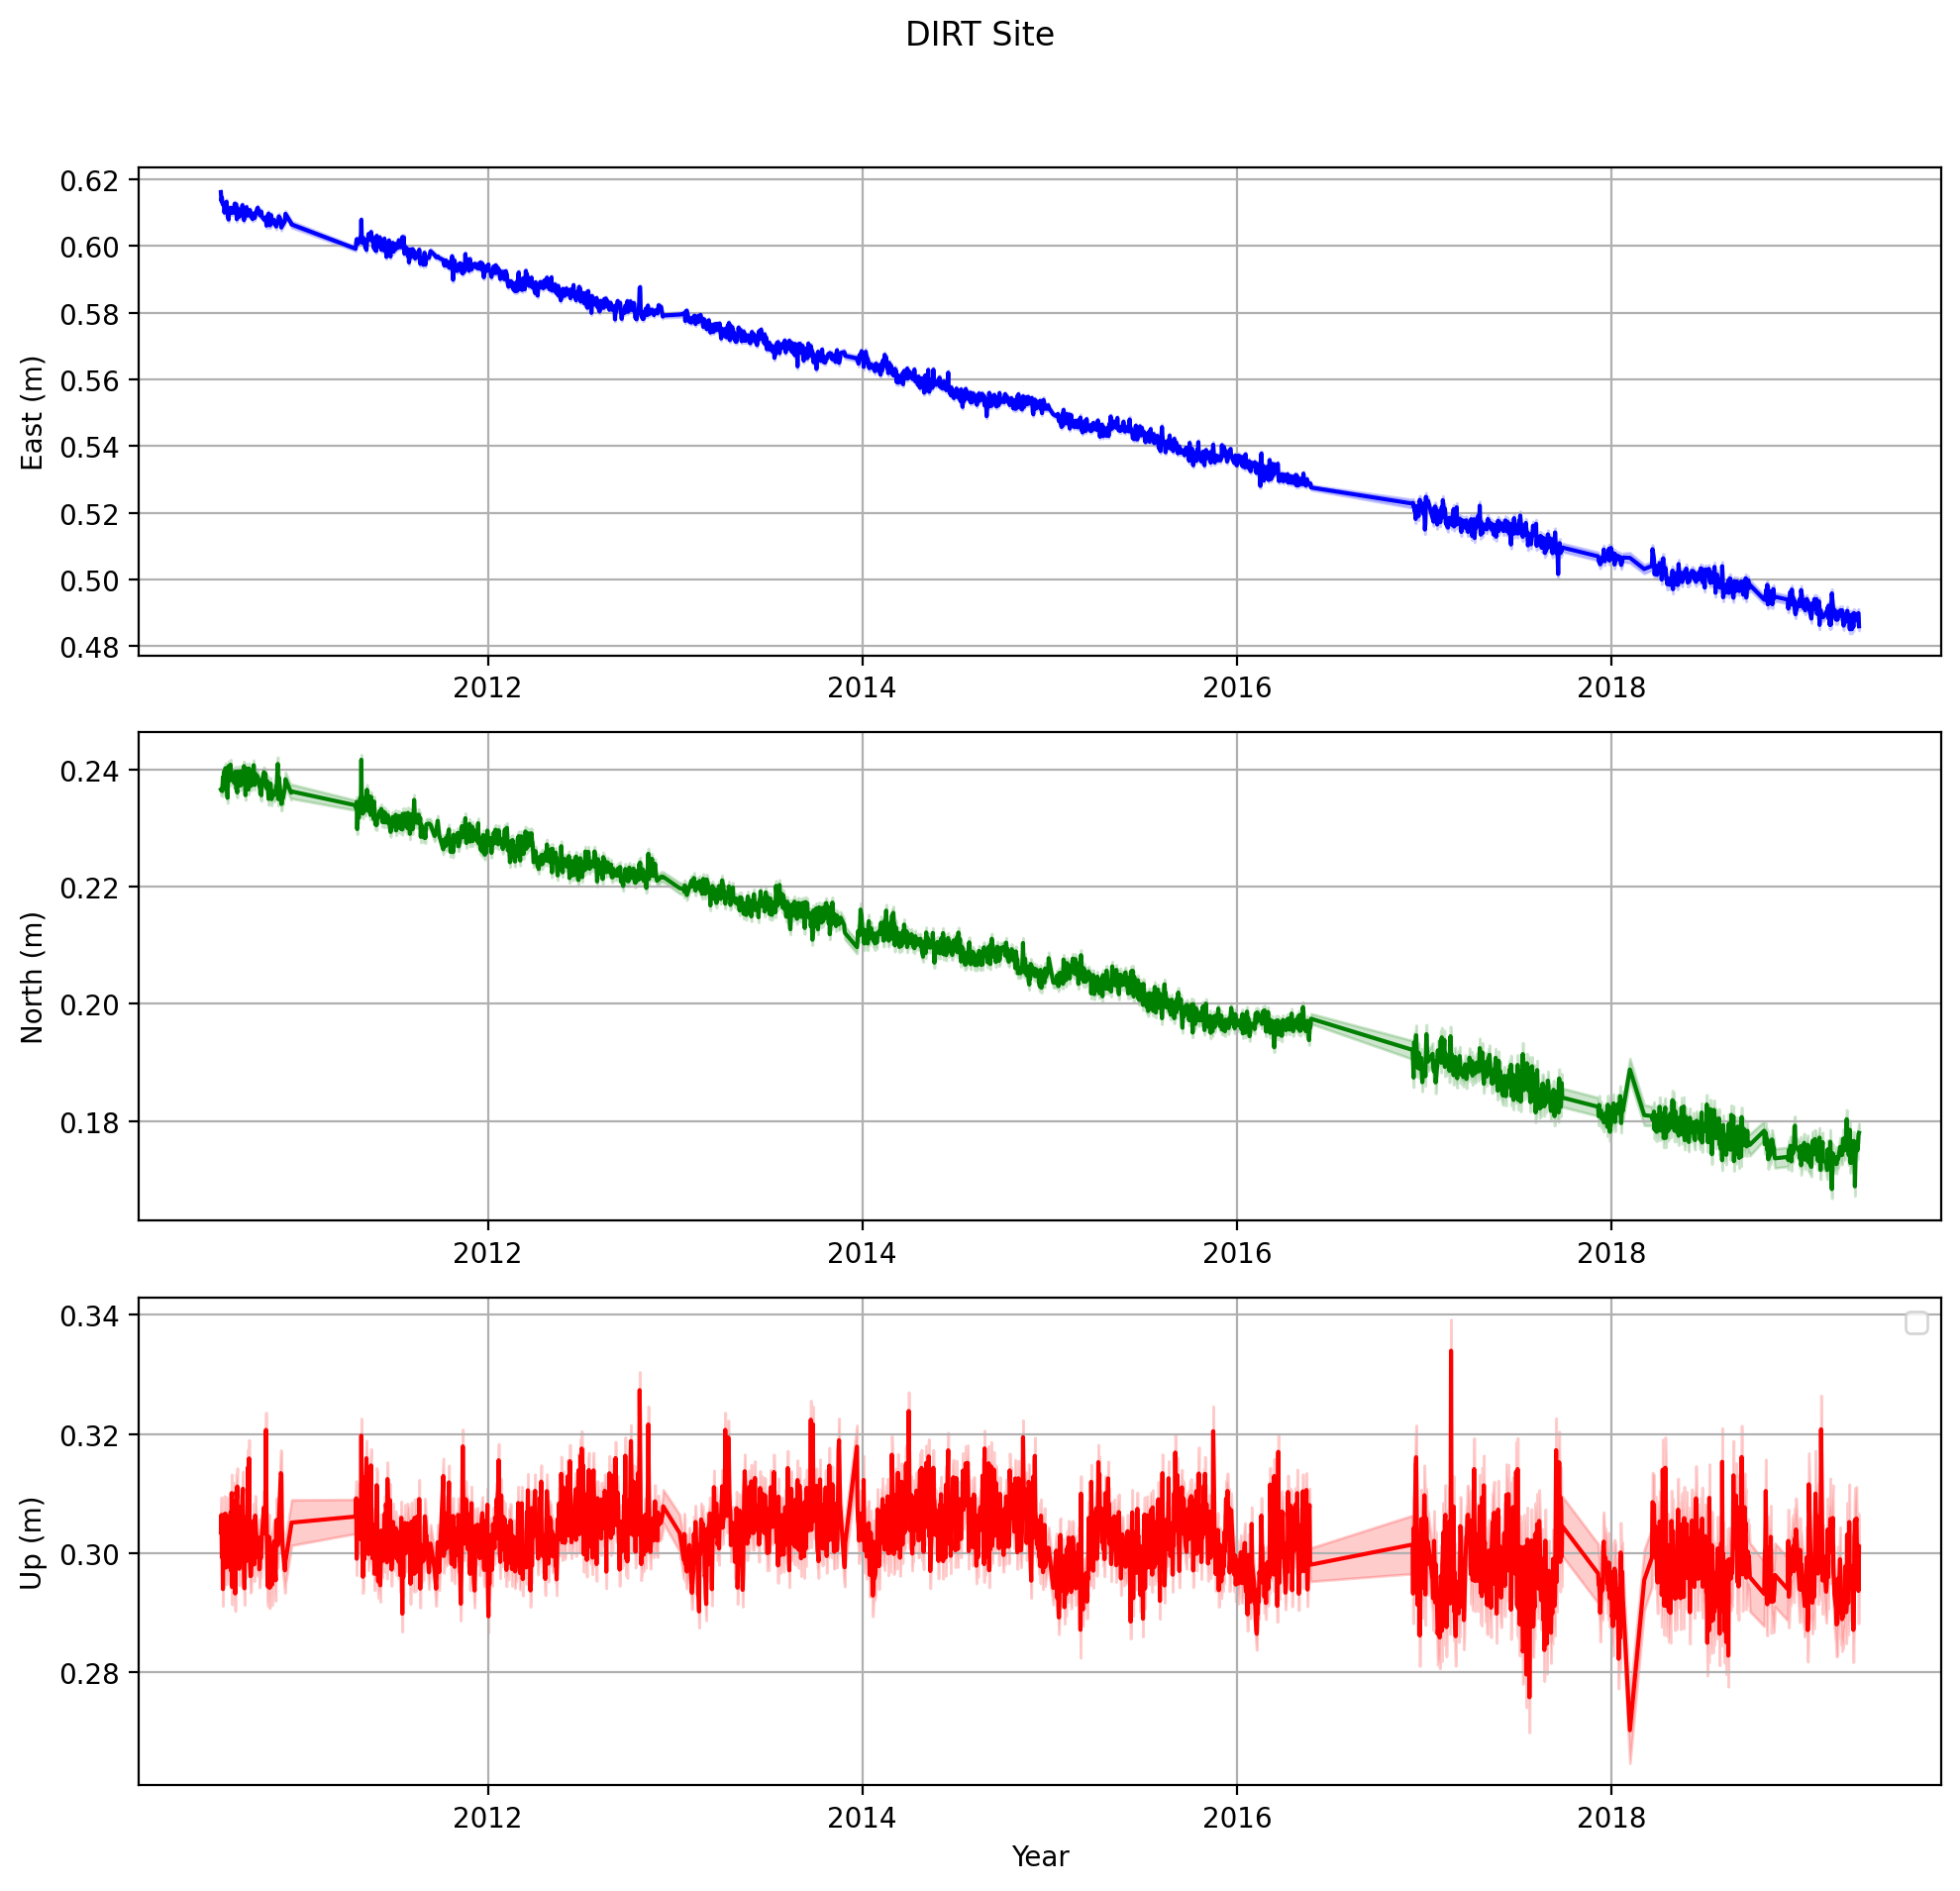

In [60]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Import the necessary libraries

# Step 2: Read in the 'tenv3' data using Pandas
# Replace 'your_data.csv' with the actual file path of your data
file_path = '/Users/Adrian/Downloads/DIRT.tenv3'
df = pd.read_csv(file_path, delim_whitespace=True )

# Step 3: Create a figure with three subplots
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10, 10))

# Step 4: Create subplots for 'yyyy.yyyy' vs. '__east(m)', '_north(m)', and '____up(m)' columns
# Optionally, include uncertainty columns in the plots
axes[0].plot(df['yyyy.yyyy'], df['__east(m)'], label='__east(m)', color='blue')
axes[0].fill_between(df['yyyy.yyyy'], df['__east(m)'] - df['sig_e(m)'], df['__east(m)'] + df['sig_e(m)'], color='blue', alpha=0.2)
axes[0].set_ylabel('East (m)')
axes[0].grid()

axes[1].plot(df['yyyy.yyyy'], df['_north(m)'], label='_north(m)', color='green')
axes[1].fill_between(df['yyyy.yyyy'], df['_north(m)'] - df['sig_n(m)'], df['_north(m)'] + df['sig_n(m)'], color='green', alpha=0.2)
axes[1].set_ylabel('North (m)')
axes[1].grid()

axes[2].plot(df['yyyy.yyyy'], df['____up(m)'], label='____up(m)', color='red')
axes[2].fill_between(df['yyyy.yyyy'], df['____up(m)'] - df['sig_u(m)'], df['____up(m)'] + df['sig_u(m)'], color='red', alpha=0.2)
axes[2].set_ylabel('Up (m)')
axes[2].set_xlabel('Year')
axes[2].grid()

# Step 5: Customize the plot
plt.suptitle('DIRT Site')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust the subplot layout for the title
plt.legend()

# Show the plot
plt.show()
